This demo uses the single-compartment model to change simple spike firing rate down

In [2]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
from Units import *
from tqdm import tqdm

from Parameters_4 import *
from PC_four_channel import *

Change background current to have different ss firing rate (with cs at 400ms)

100%|██████████| 20/20 [18:16<00:00, 54.83s/it]


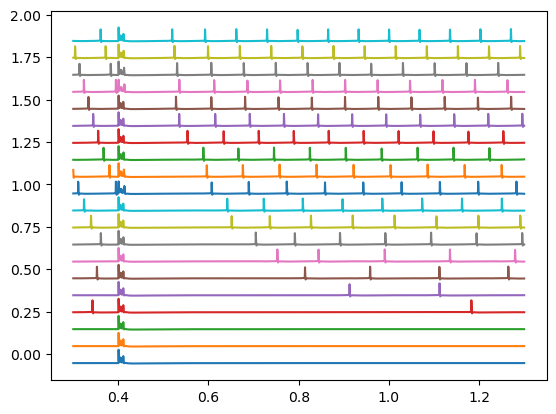

In [17]:
# set model params
t_run=1.3
cf_current_value = 90
cs_duration=100*ms
cs_times = [400*ms]
cf_a = [cf_current_value*uA]*len(cs_times)

plt.figure()

for i,background_current in enumerate(tqdm(np.arange(64.6,65.6,0.05))):

    # run the model
    i_e=Electrode(cs_times,cs_duration,cf_a,background_current*uA)

    somatic_voltage=Somatic_voltage(c_soma,g_rna,g_k,g_sk,g_ca,g_leak,e_na,e_k,e_ca,e_leak,i_e,v_initial)
    f=All_derivatives(somatic_voltage,rna_states,rate_k,rate_sk,rate_ca,rate_ca_concentration)
    rna_y_initial=[rna_states.c1_initial,rna_states.c2_initial,0,0,0,0,0,0,0,0,0,0,0]
    y_initial=[somatic_voltage.v_initial,0]+rna_y_initial+[0,0,baseline_calcium_concentration]

    t0=0
    t1=t_run

    integrator = ode(f).set_integrator('vode', method='bdf', with_jacobian=False)
    integrator.set_initial_value(y_initial, t0)

    norm_n=10
    print_n=100

    norm_c=1
    print_c=1

    time_base = []
    voltage_trace = []

    while integrator.successful() and integrator.t < t1:

        integrator.integrate(integrator.t+dt)

        if norm_c==1:
            y=integrator.y
            y=normalize(y)
            integrator.set_initial_value(y,integrator.t)
            norm_c=norm_n

        if print_c==1:
            print_c=print_n
            time_base.append(integrator.t)
            voltage_trace.append(integrator.y[0])
        norm_c-=1
        print_c-=1


    # plot the complex spike
    time_base = np.array(time_base)
    voltage_trace = np.array(voltage_trace)

    plt.plot(time_base[time_base > 300*ms],voltage_trace[time_base > 300*ms] + i*100*mV)

plt.show()

Change background current to have different ss firing rate (without cs)

100%|██████████| 20/20 [17:55<00:00, 53.80s/it]


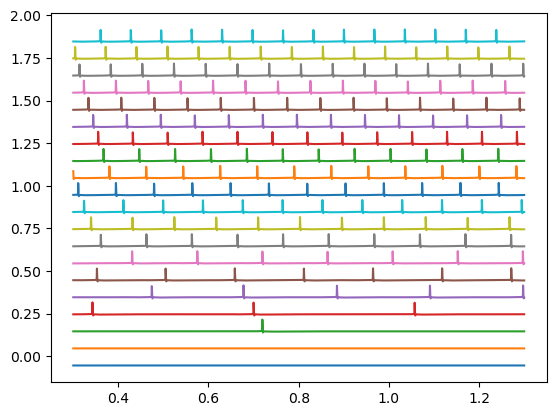

In [18]:
# set model params
t_run=1.3
cf_current_value = 90
cs_duration=100*ms
cs_times = []
cf_a = [cf_current_value*uA]*len(cs_times)

plt.figure()

for i,background_current in enumerate(tqdm(np.arange(64.6,65.6,0.05))):

    # run the model
    i_e=Electrode(cs_times,cs_duration,cf_a,background_current*uA)

    somatic_voltage=Somatic_voltage(c_soma,g_rna,g_k,g_sk,g_ca,g_leak,e_na,e_k,e_ca,e_leak,i_e,v_initial)
    f=All_derivatives(somatic_voltage,rna_states,rate_k,rate_sk,rate_ca,rate_ca_concentration)
    rna_y_initial=[rna_states.c1_initial,rna_states.c2_initial,0,0,0,0,0,0,0,0,0,0,0]
    y_initial=[somatic_voltage.v_initial,0]+rna_y_initial+[0,0,baseline_calcium_concentration]

    t0=0
    t1=t_run

    integrator = ode(f).set_integrator('vode', method='bdf', with_jacobian=False)
    integrator.set_initial_value(y_initial, t0)

    norm_n=10
    print_n=100

    norm_c=1
    print_c=1

    time_base = []
    voltage_trace = []

    while integrator.successful() and integrator.t < t1:

        integrator.integrate(integrator.t+dt)

        if norm_c==1:
            y=integrator.y
            y=normalize(y)
            integrator.set_initial_value(y,integrator.t)
            norm_c=norm_n

        if print_c==1:
            print_c=print_n
            time_base.append(integrator.t)
            voltage_trace.append(integrator.y[0])
        norm_c-=1
        print_c-=1


    # plot the complex spike
    time_base = np.array(time_base)
    voltage_trace = np.array(voltage_trace)

    plt.plot(time_base[time_base > 300*ms],voltage_trace[time_base > 300*ms] + i*100*mV)

plt.show()